<a href="https://colab.research.google.com/github/Srinidhicell/OIBSIP_TASK4/blob/main/EMAIL_SPAM_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EMAIL SPAM DETECTION USING MACHINE LEARNING MODEL


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing necessary libraries

# for numerical operations
import pandas as pd
import numpy as np

# for graphical visualization
import matplotlib.pyplot as plt
import seaborn as sns

 Data Collection


In [ ]:
sms_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spam.csv' , encoding = "ISO-8859-1")

Analysing Dataset


In [ ]:
sms_df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
# (rows,columns)
sms_df.shape

(5572, 5)

In [ ]:
# rows*columns
sms_df.size

27860

In [ ]:
# first 5 records
sms_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# last five records
sms_df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
# random 5 records
sms_df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2234,ham,What's your room number again? Wanna make sure...,NaN,NaN,NaN
88,ham,I'm really not up to it still tonight babe,NaN,NaN,NaN
1459,spam,Bought one ringtone and now getting texts cost...,NaN,NaN,NaN
5541,ham,Yeah it's jus rite...,NaN,NaN,NaN
3659,ham,I will reach ur home in &lt;#&gt; minutes,NaN,NaN,NaN


In [ ]:
sms_df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [ ]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
'''
no numeric data,
thus there is no benefit of applying describe()
'''
# sms_df.describe()

'\nno numeric data,\nthus there is no benefit of applying describe()\n'

 Data Preprocessing
 

In [ ]:
sms_df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Dropping columns

In [ ]:
sms_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [ ]:
sms_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms_df.rename(columns={'v1':'target','v2':'sms'},inplace=True)

In [ ]:
sms_df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# note :- duplicated() function returns boolean values 
#  False - >  duplicated record not found
#  True  - > duplicated record found

sms_df[sms_df.duplicated()]

,target,sms
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [ ]:
# total number of duplicated records in our dataframe
sms_df.duplicated().sum()

403

In [ ]:
# before removing duplicate records
sms_df.shape

(5572, 2)

In [ ]:
sms_df.drop_duplicates(inplace=True)

In [ ]:
# after removing duplicate records
sms_df.shape

(5169, 2)

Exploratory Data Analysis ( EDA ) :- 


In [ ]:
sms_df.columns

Index(['target', 'sms'], dtype='object')

In [ ]:
# 'target' column contain higher 'ham' sms,
# thus, data seems unbalance


# Total number of 'ham' and 'spam' messages in 'target' column
sms_df['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

In [ ]:
# in percentage
sms_df['target'].value_counts(normalize=True)*100

ham     87.366996
spam    12.633004
Name: target, dtype: float64

Count plot


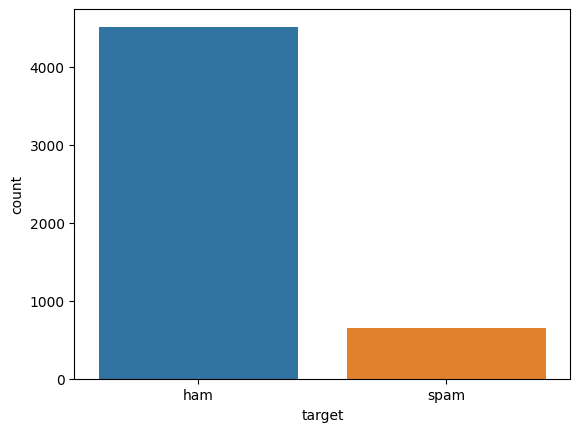

In [ ]:
sns.countplot(x=sms_df['target'])
plt.show()

Pie chart


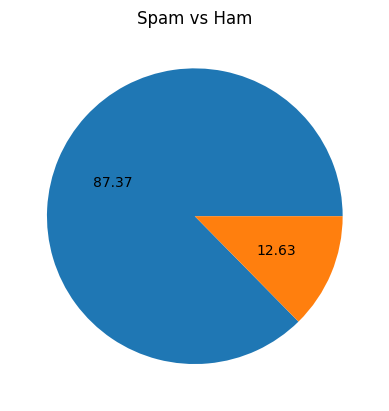

In [ ]:
# Calculating individal % of each category of 'Species' column

plt.pie(x=sms_df['target'].value_counts(),autopct='%.2f')
plt.title('Spam vs Ham')
plt.show()

#### WordCloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
plt.figure(figsize=(30,30))
wc=WordCloud(width=2000,height=1000,background_color='black')

<Figure size 3000x3000 with 0 Axes>

###### For spam sms

In [ ]:
# Note :- .str -> used to convert 'series' object into 'string'
# .cat() -> used to seprate each records by " " (space)

spam_wc=wc.generate(sms_df[sms_df['target']=='spam']['sms'].str.cat(sep=" "))
spam_wc

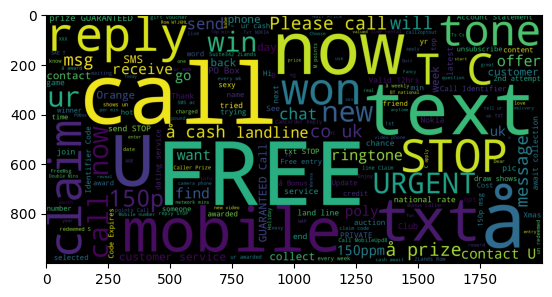

In [ ]:
plt.imshow(spam_wc)
plt.show()

##### for ham sms

In [ ]:
ham_wc=wc.generate(sms_df[sms_df['target']=='ham']['sms'].str.cat(sep=" "))
ham_wc

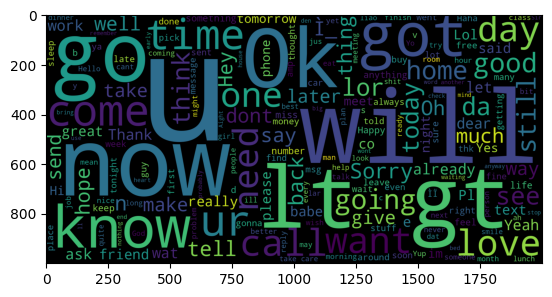

In [ ]:
plt.imshow(ham_wc)
plt.show()

Feature Encoding


In [ ]:
# converting 'spam' as 1 and 'ham' as 0 numeric value
sms_df['target']=sms_df['target'].map({'spam':1,'ham':0})

In [ ]:
sms_df['target'].unique()

array([0, 1])

In [ ]:
sms_df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


 Text Preprocessing 


In [ ]:
# nltk -> natural language tool kit
# PUNKT is an unsupervised trainable model tokenizer
# It tokenizer divides a text into a list of sentences by using an unsupervised algorithm
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import string

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(string.punctuation,"\n\n")

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 




In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def transform_sms(message):
    
    # to convert all characters in lower case
    message=message.lower()
    
    # to break sms record into words
    message=nltk.word_tokenize(message)
    
    # to remove special symbals
    temp=[]
    for i in message:
        if i.isalnum():
            temp.append(i)

    # creating clone of temp
    message=temp[:]   
    
    # clear the temp object
    temp.clear()
    
    # removing stopwords and punctuations
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)
    
    message=temp[:]
    temp.clear()
    
    # stemming
    for i in message:
        temp.append(ps.stem(i))
    
    
    return " ".join(temp)

In [ ]:
# calling function 'transform_sms' by passing 'sms' records

sms_df['sms']=sms_df['sms'].apply(transform_sms)

In [ ]:
# after transformation
sms_df.head()

,target,sms
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


#### WordCloud on tranformed sms column

In [ ]:
# note :- now 'spam' is equal to 1 

spam_wc=wc.generate(sms_df[sms_df['target']==1]['sms'].str.cat(sep=" "))
spam_wc

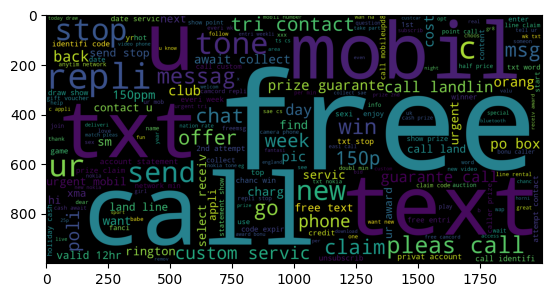

In [ ]:
plt.imshow(spam_wc)
plt.show()

In [ ]:
# for storing most used words
most_used_spam_words=[]

# .tolist() -> to convert 'series' object into 'list'
spam_list=sms_df[sms_df['target']==1]['sms'].tolist()

# accessing each individual elements from spam_list
for sentense in spam_list:
    
    # accessing each individual word form list elements
    for word in sentense.split():
        most_used_spam_words.append(word)


In [ ]:
# used for finding most comman words
from collections import Counter

In [ ]:
top_10=pd.DataFrame(Counter(most_used_spam_words).most_common(10))

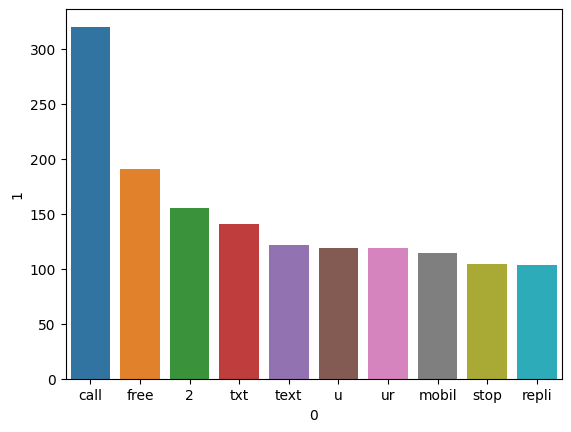

In [ ]:
sns.barplot(x=top_10[0],y=top_10[1])
plt.show()

In [ ]:
# note :- now 'ham' is equal to 0 

ham_wc=wc.generate(sms_df[sms_df['target']==0]['sms'].str.cat(sep=" "))
ham_wc

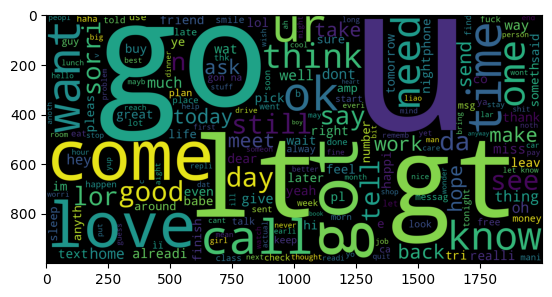

In [ ]:
plt.imshow(ham_wc)
plt.show()

In [ ]:
# for storing most used words
most_used_ham_words=[]

# .tolist() -> to convert 'series' object into 'list'
ham_list=sms_df[sms_df['target']==0]['sms'].tolist()

# accessing each individual elements from spam_list
for sentense in ham_list:
    
    # accessing each individual word form list elements
    for word in sentense.split():
        most_used_ham_words.append(word)


In [ ]:
top_10_ham=pd.DataFrame(Counter(most_used_ham_words).most_common(10))

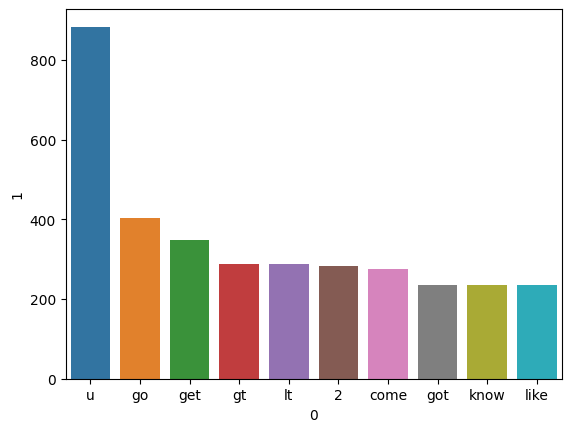

In [ ]:
sns.barplot(x=top_10_ham[0],y=top_10_ham[1])
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf=TfidfVectorizer()

In [ ]:
# converting into vectors
x=tfidf.fit_transform(sms_df['sms']).toarray()

In [ ]:
x.shape

(5169, 6708)

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y=sms_df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
y.shape

(5169,)

 Train Test Split


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (4135, 6708)
x_test - >   (1034, 6708)
y_train - >   (4135,)
y_test - >   (1034,)


Training and Evaluating model


 LogisticRegression 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lr=LogisticRegression()

In [ ]:
# train the model
model_lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# testing
y_pred_lr=model_lr.predict(x_test)
y_pred_lr

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,precision_score

In [ ]:
print("accuracy score :- ",accuracy_score(y_test,y_pred_lr))
print("precision score :- ",precision_score(y_test,y_pred_lr))

accuracy score :-  0.9487427466150871
precision score :-  0.9423076923076923
